In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv("onlineretail.csv",delimiter=',', encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: >

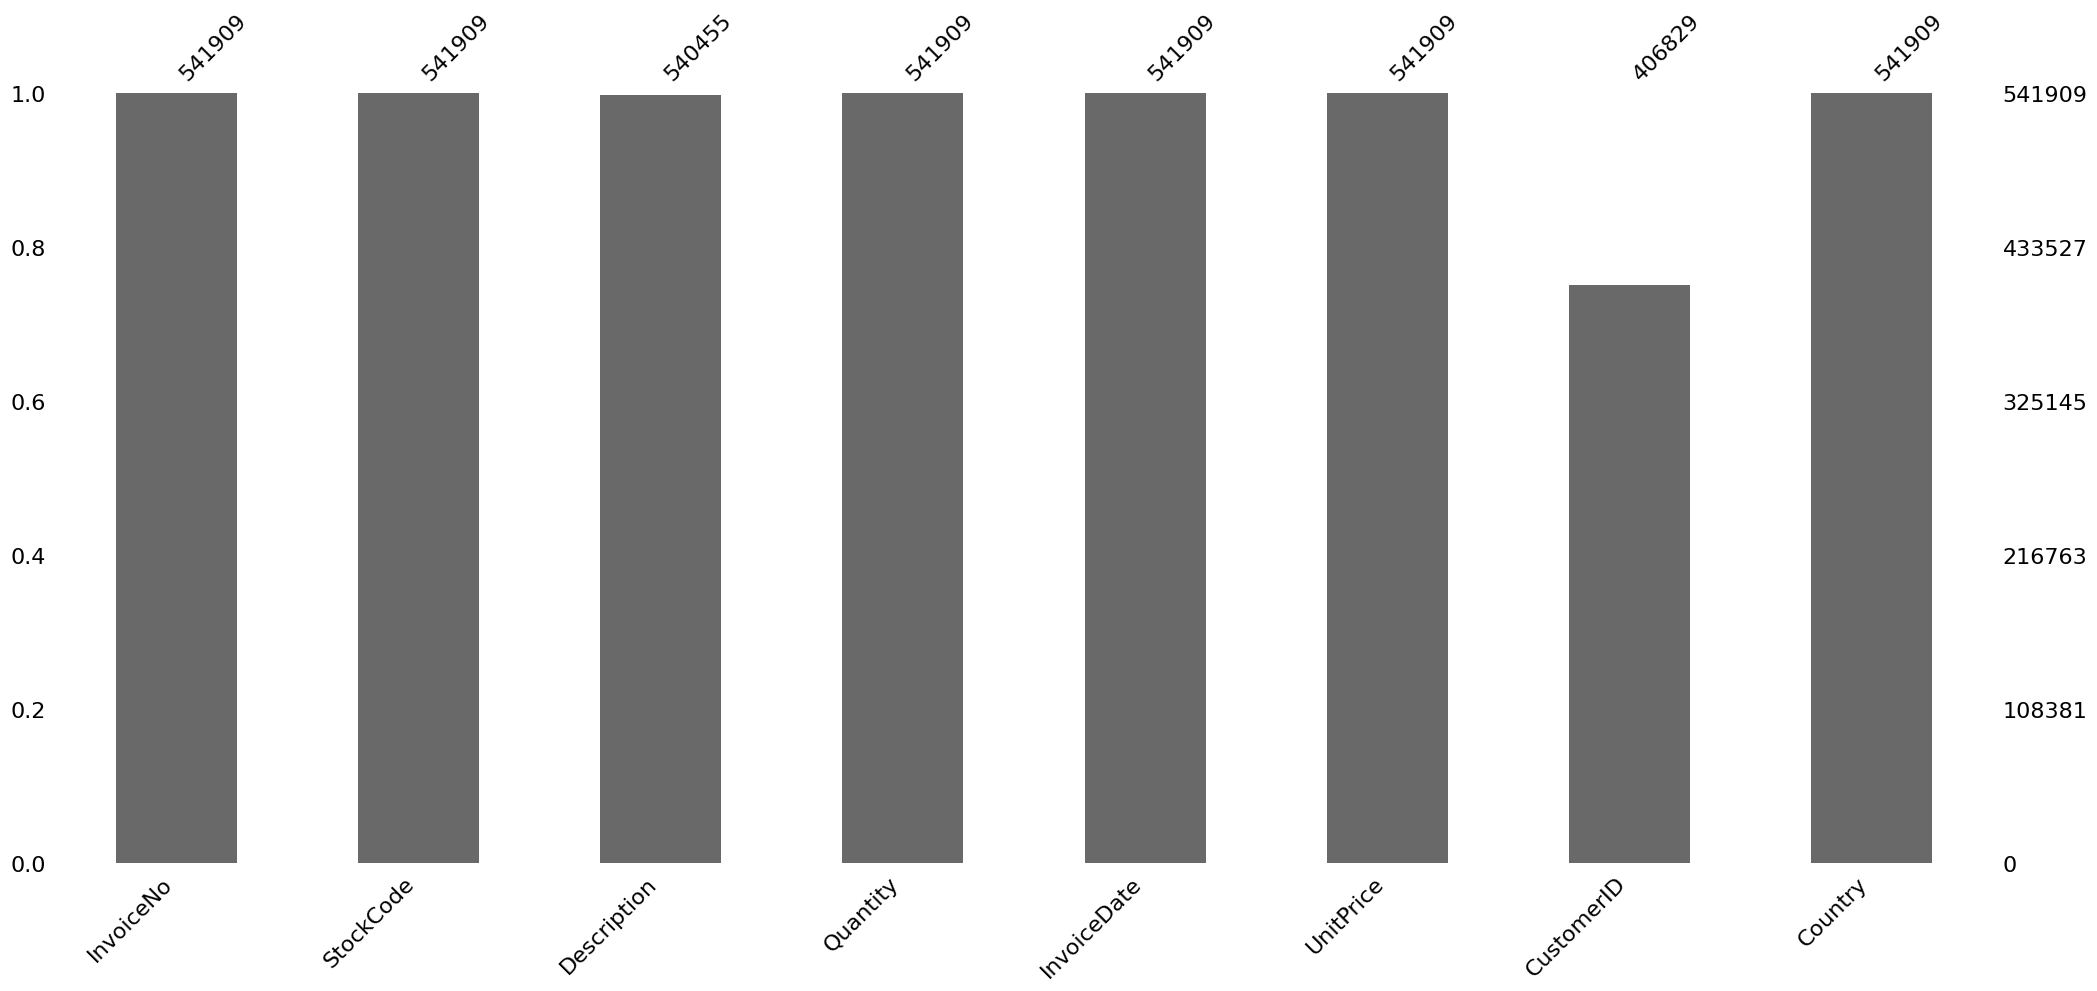

In [5]:
msno.bar(df)

In [6]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [7]:
df[df['CustomerID'].isnull()].count()

InvoiceNo      135080
StockCode      135080
Description    133626
Quantity       135080
InvoiceDate    135080
UnitPrice      135080
CustomerID          0
Country        135080
dtype: int64

In [8]:
a = 100 - ((541909-135000)/541909 * 100)
print("Percentge of values missing:- ",a)

Percentge of values missing:-  24.911931708091203


In [9]:
df.dropna(inplace=True)

<Axes: >

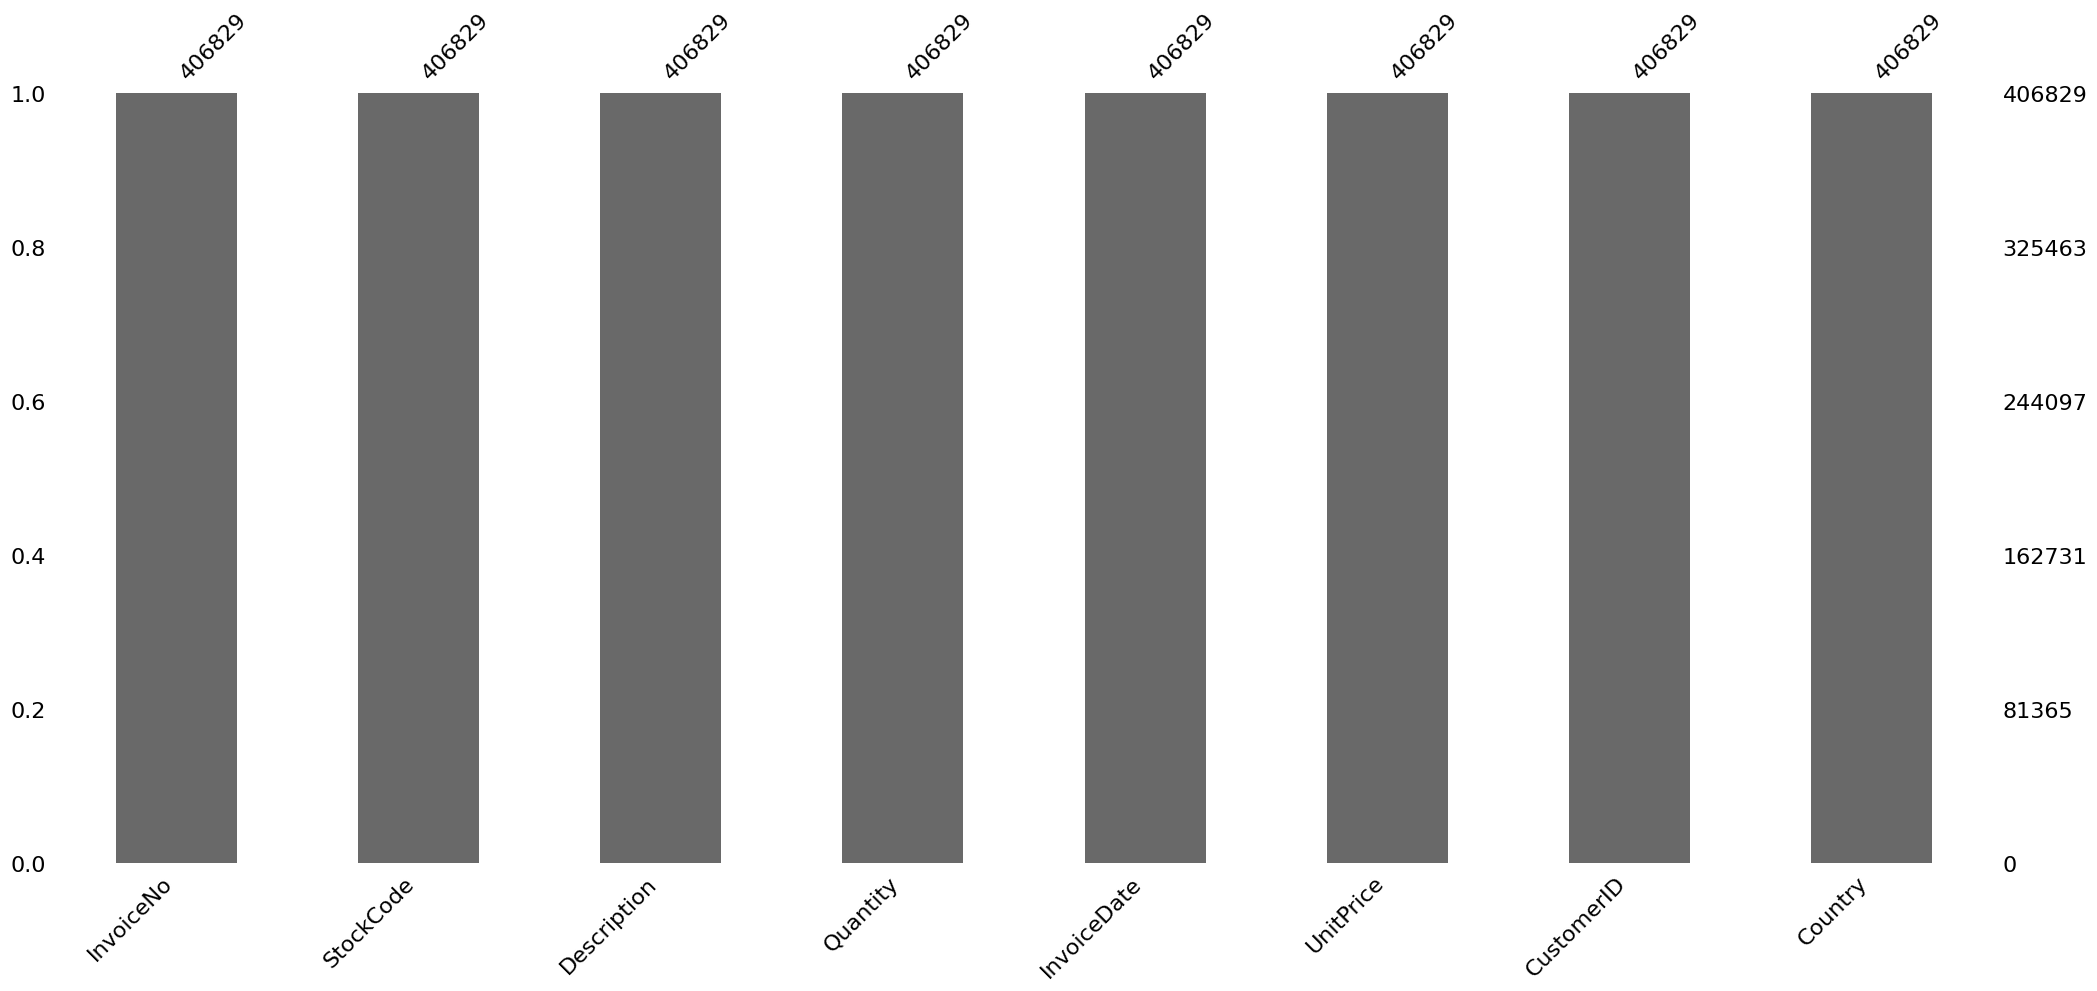

In [10]:
msno.bar(df)

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M')

In [12]:
df['Total Amount Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total Amount Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
transactions = df['InvoiceNo'].groupby(df['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
final = df['InvoiceDate'].max()
df['Last_transact'] = final - df['InvoiceDate']
LT = df.groupby(df['CustomerID']).min()['Last_transact']
LT = pd.DataFrame(LT).reset_index()
LT.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [15]:
df_new = pd.merge(total_amount, transaction, how='inner', on='CustomerID')

In [16]:
df_new = pd.merge(df_new, LT, how='inner', on='CustomerID')

In [17]:
df_new.head()

,CustomerID,Total Amount Spent,InvoiceNo,Last_transact
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [18]:
df_new['Last_transact'] = df_new['Last_transact'].dt.days

In [19]:
df_new.head()

,CustomerID,Total Amount Spent,InvoiceNo,Last_transact
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']])
pred = kmeans.predict(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
kmeans.cluster_centers_

array([[1.65070406e+03, 9.06685754e+01, 9.11630783e+01],
       [1.82181982e+05, 1.82833333e+03, 6.66666667e+00]])

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
pred = pd.DataFrame(pred, columns=['pred'])
df_new = df_new.join(pred)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17092\3755150140.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ty=sns.stripplot(x='pred', y='Total Amount Spent', data=df_new, s=8, ax = ax[0], palette='magma_r')


Text(0.5, 0, 'Clusters')

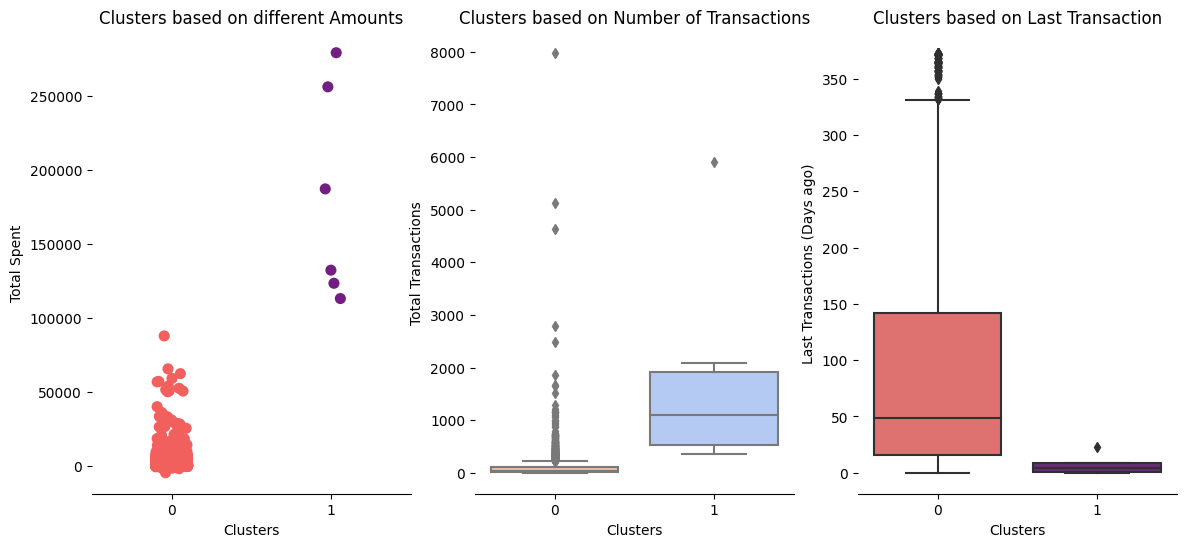

In [25]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
ty=sns.stripplot(x='pred', y='Total Amount Spent', data=df_new, s=8, ax = ax[0], palette='magma_r')
sns.despine(left=True)
ty.set_title('Clusters based on different Amounts')
ty.set_ylabel('Total Spent')
ty.set_xlabel('Clusters')

tt=sns.boxplot(x='pred', y='InvoiceNo', data=df_new, ax = ax[1], palette='coolwarm_r')
tt.set_title('Clusters based on Number of Transactions')
tt.set_ylabel('Total Transactions')
tt.set_xlabel('Clusters')

tr=sns.boxplot(x='pred', y='Last_transact', data=df_new, ax = ax[2], palette='magma_r')
tr.set_title('Clusters based on Last Transaction')
tr.set_ylabel('Last Transactions (Days ago)')
tr.set_xlabel('Clusters')

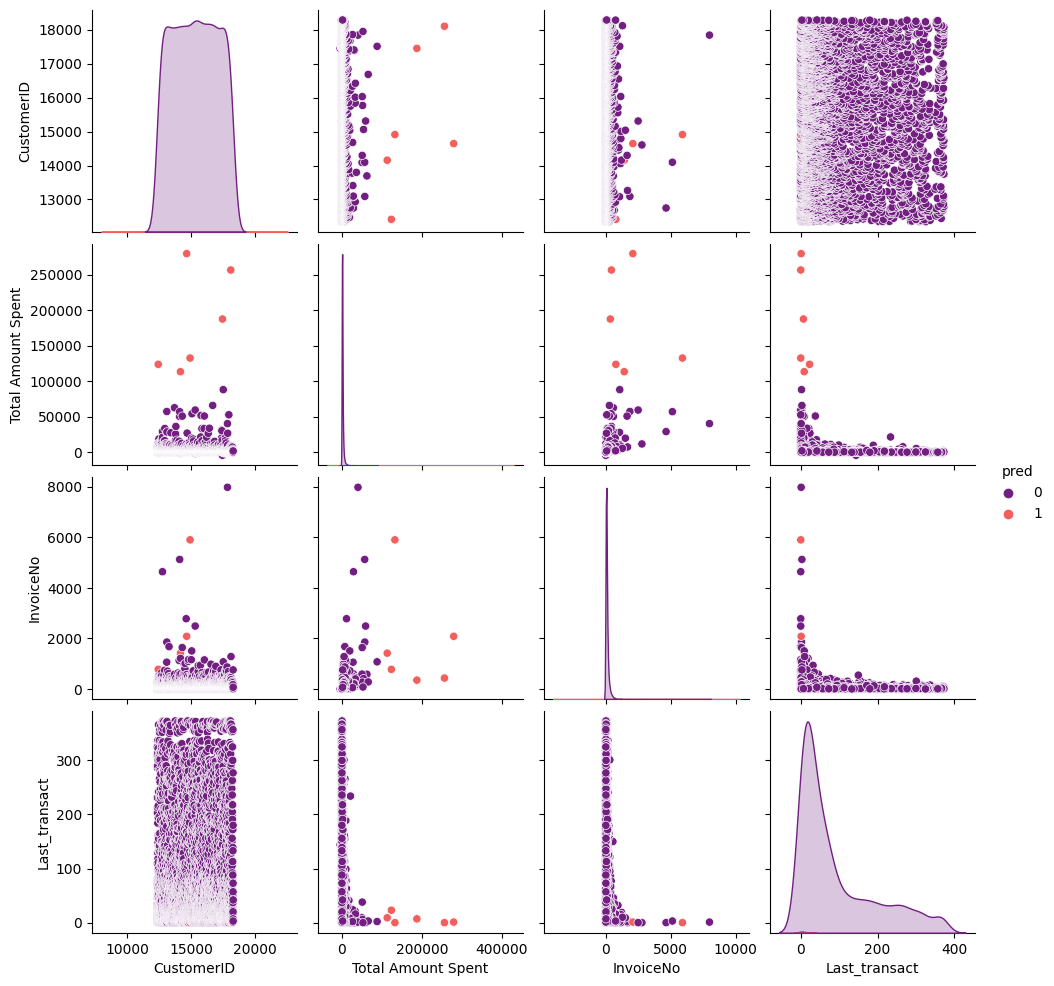

In [26]:
sns.pairplot(hue='pred', data=df_new, diag_kind='kde', palette='magma')

In [27]:
kmeans.inertia_

100276002377.65202

In [28]:
error_rate = []
for clusters in range(1,16):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(df_new)
    kmeans.predict(df_new)
    error_rate.append(kmeans.inertia_)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [29]:
error_rate = pd.DataFrame({'Cluster':range(1,16) , 'Error':error_rate})

In [30]:
error_rate

,Cluster,Error
0,1,3.085422e+11
1,2,1.132431e+11
2,3,6.237784e+10
3,4,4.337622e+10
4,5,3.099698e+10
5,6,2.194966e+10
6,7,1.604106e+10
7,8,1.281768e+10
8,9,1.034452e+10
9,10,8.749629e+09


Text(0.5, 1.0, 'Error Rate and Clusters')

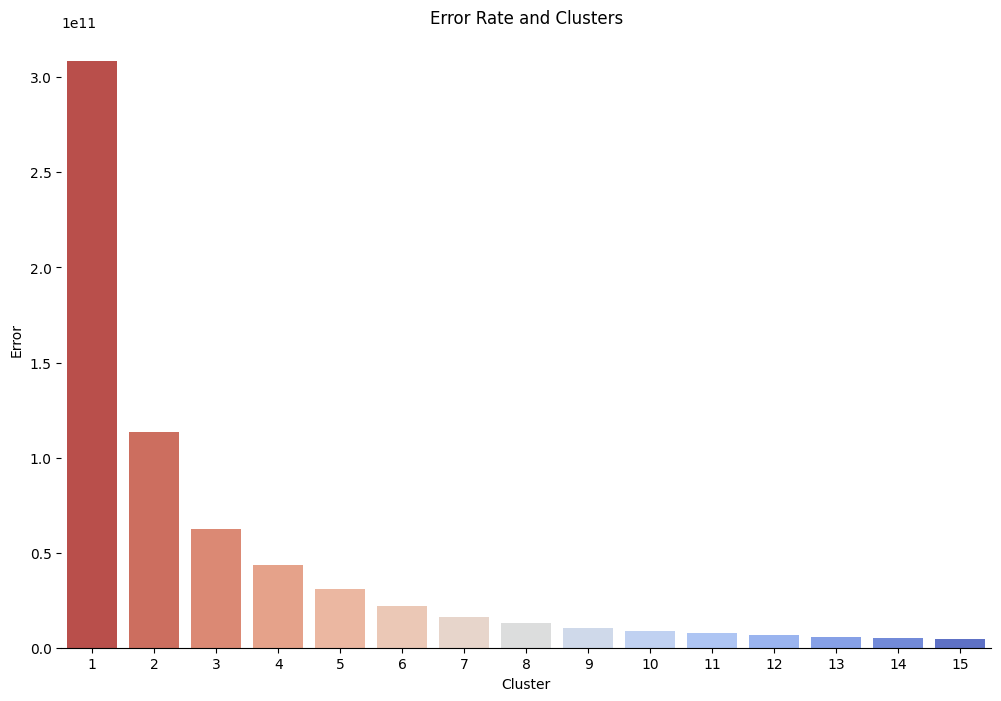

In [31]:
plt.figure(figsize=(12,8))
p = sns.barplot(x='Cluster', y= 'Error', data= error_rate, palette='coolwarm_r')
sns.despine(left=True)
p.set_title('Error Rate and Clusters')

In [32]:
country_wise = df.groupby('Country').sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17092\2950913764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_wise = df.groupby('Country').sum()


In [33]:
country_codes = pd.read_csv('wikipedia-iso-country-codes.csv', names=['Country', 'two', 'three', 'numeric', 'ISO'])

In [34]:
country_codes.head()

,Country,two,three,numeric,ISO
0,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
1,Afghanistan,AF,AFG,004,ISO 3166-2:AF
2,Åland Islands,AX,ALA,248,ISO 3166-2:AX
3,Albania,AL,ALB,008,ISO 3166-2:AL
4,Algeria,DZ,DZA,012,ISO 3166-2:DZ


In [35]:
country_wise = pd.merge(country_codes,country_wise, on='Country')

In [36]:
country_wise.head()

,Country,two,three,numeric,ISO,Quantity,UnitPrice,CustomerID,Total Amount Spent
0,Australia,AU,AUS,036,ISO 3166-2:AU,83653,4054.75,15693002.0,137077.27
1,Austria,AT,AUT,040,ISO 3166-2:AT,4827,1701.52,5021102.0,10154.32
2,Bahrain,BH,BHR,048,ISO 3166-2:BH,260,78.95,210027.0,548.40
3,Belgium,BE,BEL,056,ISO 3166-2:BE,23152,7540.13,25718288.0,40910.96
4,Brazil,BR,BRA,076,ISO 3166-2:BR,356,142.60,408608.0,1143.60


In [37]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

In [38]:
data = dict(type='choropleth',colorscale='GnBu', locations = country_wise['three'], locationmode = 'ISO-3', z= country_wise['Total Amount Spent'], text = country_wise['Country'], colorbar={'title':'Revenue'},  marker = dict(line=dict(width=0))) 
layout = dict(title = 'European Countries According to Revenue!', geo = dict(scope='europe',showlakes=False, projection = {'type': 'winkel tripel'}))
Choromaps2 = go.Figure(data=[data], layout=layout)
iplot(Choromaps2)

In [39]:
data = dict(type='choropleth',colorscale='rainbow', locations = country_wise['three'], locationmode = 'ISO-3', z= country_wise['Total Amount Spent'], text = country_wise['Country'], colorbar={'title':'Revenue'},  marker = dict(line=dict(width=0))) 
layout = dict(title = 'All Countries According to Revenue!', geo = dict(scope='world',showlakes=False, projection = {'type': 'winkel tripel'}))
Choromaps2 = go.Figure(data=[data], layout=layout)
iplot(Choromaps2)